In [1]:
from gensim.models.word2vec import Word2Vec, LineSentence
import sentencepiece as spm
import multiprocessing
num_core = multiprocessing.cpu_count()

In [4]:
sp = spm.SentencePieceProcessor(model_file='resource/code_snippet.model')
with open('resource/code_snippet3.txt', 'r', encoding='utf-8') as f:
    while True:
        line = f.readline()
        tokens = line.split(' ')
        for token in tokens:
            if sp.piece_to_id(token) == -1:
                print(token)
        

In [ ]:
sp = spm.SentencePieceProcessor(model_file='resource/code_snippet.model')
with open('resource/code_snippet2.txt', 'r', encoding='utf-8') as f, open('resource/code_snippet3.txt', 'a', encoding='utf-8') as f_a: 
    while True:
        line  = f.readline()
        if line == '':
            break
        snt = ' '.join(sp.EncodeAsPieces(line))
        print(snt, file=f)

In [2]:
from gensim.models.callbacks import CallbackAny2Vec

class LossLogger(CallbackAny2Vec):
    def __init__(self):
        self.losses = []
        self.losses2 = []
        self.epoch = 0
        # 今のロス値
        self.cumu_loss = 0.0
        # 1つ前のロス値
        self.pre_cumu_loss = 0.0
        self.now_loss = 0

    def on_epoch_end(self, model2):
        loss = model2.get_latest_training_loss()
        self.cumu_loss = float(loss)
        self.now_loss = self.cumu_loss if self.epoch == 0 else self.cumu_loss - self.pre_cumu_loss
        self.pre_cumu_loss = self.cumu_loss
        self.losses.append(self.now_loss)
        self.losses2.append(loss)
        print(f'Epoch {len(self.losses)}, Loss_diff: {self.now_loss}')
        print(f'Epoch {len(self.losses)}, Loss_latest: {loss}')
        model2.save('resource/word2vec/model8/model8_'+str(self.epoch))
        model2.running_training_loss = 0.0
        self.epoch += 1
        
loss_logger = LossLogger()
loss_val_list = []
vector_size = 256
sentence = LineSentence('resource/code_snippet3.txt')
model = Word2Vec(sentence, sg=1, vector_size=vector_size, min_count=1, window=5, epochs=20, compute_loss=True, workers=num_core, seed=100, callbacks=[loss_logger])
# model.save("model3")
with open('resource/word2vec/model8_loss.txt', 'w') as f:
    for tmp2 in loss_logger.losses2:
        print(str(tmp2), file=f)

Epoch 1, Loss_diff: 74341240.0
Epoch 1, Loss_latest: 74341240.0
Epoch 2, Loss_diff: -198672.0
Epoch 2, Loss_latest: 74142568.0
Epoch 3, Loss_diff: 411296.0
Epoch 3, Loss_latest: 74553864.0
Epoch 4, Loss_diff: -1185096.0
Epoch 4, Loss_latest: 73368768.0
Epoch 5, Loss_diff: 469976.0
Epoch 5, Loss_latest: 73838744.0
Epoch 6, Loss_diff: -660128.0
Epoch 6, Loss_latest: 73178616.0
Epoch 7, Loss_diff: -380208.0
Epoch 7, Loss_latest: 72798408.0
Epoch 8, Loss_diff: 879632.0
Epoch 8, Loss_latest: 73678040.0
Epoch 9, Loss_diff: -434248.0
Epoch 9, Loss_latest: 73243792.0
Epoch 10, Loss_diff: -418168.0
Epoch 10, Loss_latest: 72825624.0
Epoch 11, Loss_diff: 193096.0
Epoch 11, Loss_latest: 73018720.0
Epoch 12, Loss_diff: -556416.0
Epoch 12, Loss_latest: 72462304.0
Epoch 13, Loss_diff: 116320.0
Epoch 13, Loss_latest: 72578624.0
Epoch 14, Loss_diff: -705552.0
Epoch 14, Loss_latest: 71873072.0
Epoch 15, Loss_diff: 263480.0
Epoch 15, Loss_latest: 72136552.0
Epoch 16, Loss_diff: 78456.0
Epoch 16, Loss_lat

In [5]:
with open('resource/word2vec/model7_loss1.txt', 'w') as f:
    for tmp2 in loss_logger.losses2:
        print(str(tmp2), file=f)

In [ ]:
model2 = Word2Vec.load('model3')
print(model2.get_latest_training_loss())

134217728.0


In [8]:
from gensim.models.callbacks import CallbackAny2Vec

class LossLogger(CallbackAny2Vec):
    def __init__(self):
        self.losses = []
        self.losses2 = []
        self.epoch = 10
        # 今のロス値
        self.cumu_loss = 0.0
        # 1つ前のロス値
        self.pre_cumu_loss = 0.0
        self.now_loss = 0

    def on_epoch_end(self, model2):
        loss = model2.get_latest_training_loss()
        self.cumu_loss = float(loss)
        self.now_loss = self.cumu_loss if self.epoch == 0 else self.cumu_loss - self.pre_cumu_loss
        self.pre_cumu_loss = self.cumu_loss
        self.losses.append(self.now_loss)
        self.losses2.append(loss)
        print(f'Epoch {len(self.losses)}, Loss: {self.now_loss}')
        print(f'Epoch {len(self.losses)}, Loss_latest: {loss}')
        model2.save('resource/word2vec/model7_'+str(self.epoch))
        model2.running_training_loss = 0.0
        self.epoch += 1
        
model = Word2Vec.load('resource/word2vec/model7_9')
model.running_training_loss = 0.0
sentence = LineSentence('resource/code_snippet3.txt')
loss_logger = LossLogger()
model.train(sentence, total_examples=model.corpus_count, epochs=10, compute_loss=True, callbacks=[loss_logger])
print(loss_logger.losses)

Epoch 1, Loss: 73570024.0
Epoch 1, Loss_latest: 73570024.0
Epoch 2, Loss: 22648.0
Epoch 2, Loss_latest: 73592672.0
Epoch 3, Loss: -227496.0
Epoch 3, Loss_latest: 73365176.0
Epoch 4, Loss: -364344.0
Epoch 4, Loss_latest: 73000832.0
Epoch 5, Loss: 201160.0
Epoch 5, Loss_latest: 73201992.0
Epoch 6, Loss: -674712.0
Epoch 6, Loss_latest: 72527280.0
Epoch 7, Loss: -1390168.0
Epoch 7, Loss_latest: 71137112.0
Epoch 8, Loss: 668576.0
Epoch 8, Loss_latest: 71805688.0
Epoch 9, Loss: -782208.0
Epoch 9, Loss_latest: 71023480.0
Epoch 10, Loss: 533904.0
Epoch 10, Loss_latest: 71557384.0
[73570024.0, 22648.0, -227496.0, -364344.0, 201160.0, -674712.0, -1390168.0, 668576.0, -782208.0, 533904.0]


In [9]:
with open('resource/word2vec/model7_loss1.txt', 'a') as f:
    for tmp2 in loss_logger.losses2:
        print(str(tmp2), file=f)

In [ ]:
from gensim.models.callbacks import CallbackAny2Vec

class LossLogger(CallbackAny2Vec):
    def __init__(self):
        self.losses = []
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        self.losses.append(loss)
        print(f'Epoch {len(self.losses)}, Loss: {loss}')
        model.save('resource/word2vec/model4_'+str(self.epoch))
        self.epoch += 1
        
sp = spm.SentencePieceProcessor(model_file='resource/code_snippet.model')
loss_logger = LossLogger()
loss_val_list = []
vector_size = 256
sentence = LineSentence('resource/code_snippet3.txt')
model = Word2Vec(sentence, sg=1, vector_size=vector_size, min_count=1, window=5, epochs=10, compute_loss=True, workers=1, seed=100, callbacks=[loss_logger])
# model.save("model3")

Epoch 1, Loss: 134217728.0
Epoch 2, Loss: 134217728.0
Epoch 3, Loss: 134217728.0
Epoch 4, Loss: 134217728.0
Epoch 5, Loss: 134217728.0
Epoch 6, Loss: 134217728.0
Epoch 7, Loss: 134217728.0
Epoch 8, Loss: 134217728.0
Epoch 9, Loss: 134217728.0
Epoch 10, Loss: 134217728.0


In [ ]:
model.get_latest_training_loss()

134217728.0

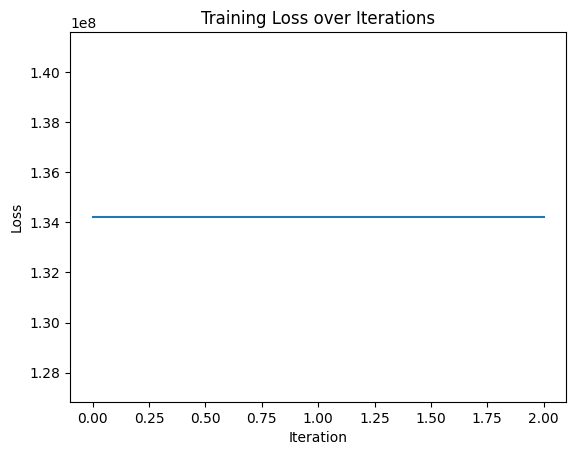

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_val_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()

In [ ]:
model = Word2Vec.load('resource/word2vec/model4_0')
model2 = Word2Vec.load('resource/word2vec/model4_1')
model3 = Word2Vec.load('resource/word2vec/model4_2')

In [ ]:
print(model.get_latest_training_loss())
print(model.get_latest_training_loss())
print(model.get_latest_training_loss())

134217728.0
134217728.0
134217728.0


In [ ]:
print(model.corpus_count)
print(model2.corpus_count)
print(model3.corpus_count)


572220
572220
572220


In [ ]:
print(model.wv.most_similar('▁def'))
print(model2.wv.most_similar('▁def'))
print(model3.wv.most_similar('▁def'))

[('self', 0.4681047797203064), ('_', 0.43842124938964844), ('<ctxt>', 0.42222991585731506), ('▁test', 0.4195534288883209), ('▁return', 0.4166620373725891), ('▁', 0.4138110876083374), ('):', 0.41030827164649963), ('▁self', 0.4094693660736084), ('▁async', 0.3999880850315094), ('<sep>', 0.39522185921669006)]
[('self', 0.49105507135391235), ('▁return', 0.4644278883934021), ('(', 0.4596945345401764), ('▁self', 0.42661967873573303), ('▁test', 0.41681811213493347), ('.', 0.41298919916152954), ('):', 0.4116331934928894), ('<sep>', 0.4061950743198395), ('▁class', 0.3980052173137665), ('_', 0.396666556596756)]
[('self', 0.46803098917007446), ('▁self', 0.441415935754776), ('▁@', 0.4293382465839386), ('):', 0.4218350052833557), ('_', 0.41000860929489136), ('<sep>', 0.40230366587638855), ('staticmethod', 0.4003777801990509), ('classmethod', 0.3899044692516327), ('▁return', 0.3885442018508911), ('▁class', 0.38147228956222534)]


In [ ]:
vocab = model2.wv.index_to_key
with open('test.txt', 'a') as f:
    for word in vocab:
        print(word, file=f) 

In [3]:
model = Word2Vec.load('resource/word2vec/model7/model7_18')
print(model.get_latest_training_loss())
print(model.corpus_count)
print(model.wv.most_similar('▁def'))


71023480.0
572220
[('staticmethod', 0.5905128121376038), ('classmethod', 0.5132139921188354), ('self', 0.4843156337738037), ('▁test', 0.47513890266418457), ('▁@', 0.46527475118637085), ('abstractmethod', 0.45951974391937256), ('▁async', 0.45680421590805054), ('__(', 0.42482084035873413), ('_', 0.41515496373176575), ('▁class', 0.41012099385261536)]


In [4]:
model = Word2Vec.load('resource/word2vec/model8/model8_18')
print(model.get_latest_training_loss())
print(model.corpus_count)
print(model.wv.most_similar('▁def'))

71445936.0
572220
[('staticmethod', 0.5776503086090088), ('▁test', 0.5226782560348511), ('classmethod', 0.5020880699157715), ('▁async', 0.4952702224254608), ('self', 0.49284300208091736), ('▁@', 0.4509302079677582), ('_', 0.44459277391433716), ('abstractmethod', 0.43911096453666687), ('▁self', 0.4197990596294403), ('__(', 0.4192160665988922)]
